# Trab Regressão Multivariada

In [169]:
import pandas as pd
dataframe = pd.read_csv("dados_regressao_mult.csv")

## Interepretando o Dataset

In [170]:
dataframe.head()

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,20242510284,50.0,177.0,M,91.0,7.0,4.0,45.0,1.0,12.0,2.0,4.0,4.0,Vila Velha
1,20242510285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20242510286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20242510287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20242510288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
print(dataframe.shape)

(188, 14)


In [172]:
dataframe.describe()

,matr_aluno,idade,altura (cm),peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes
count,1.880000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,135.000000
mean,2.024251e+10,35.477612,174.134328,83.811194,6.906716,3.216418,52.097015,1.149254,9.955224,2.400746,2.395522,3.837037
std,5.511140e+01,8.174522,8.117364,18.728374,0.934244,1.885289,28.239276,0.482903,2.241494,0.926429,2.048358,0.812288
min,2.024251e+10,22.000000,155.000000,52.500000,3.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,2.000000
25%,2.024251e+10,29.250000,170.000000,71.250000,6.000000,2.000000,40.000000,1.000000,8.000000,2.000000,1.000000,3.000000
50%,2.024251e+10,34.000000,174.000000,82.000000,7.000000,3.000000,60.000000,1.000000,10.000000,2.000000,2.000000,4.000000
75%,2.024251e+10,39.000000,179.000000,95.000000,7.500000,5.000000,60.000000,1.000000,12.000000,3.000000,4.000000,4.000000
max,2.024251e+10,62.000000,197.000000,180.000000,9.000000,7.000000,180.000000,3.000000,16.000000,6.000000,10.000000,7.000000


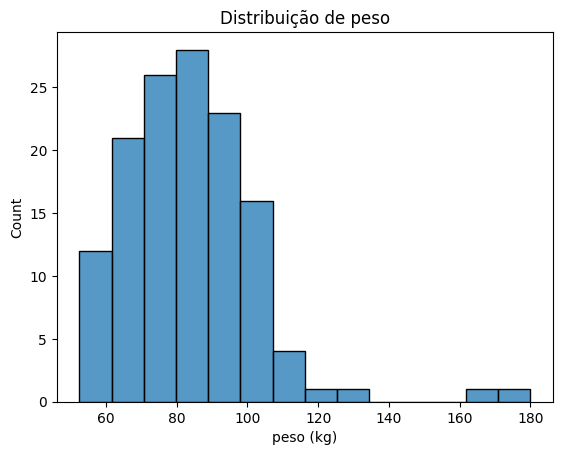

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Distribuição de peso")
sns.histplot(dataframe["peso (kg)"])
plt.show()

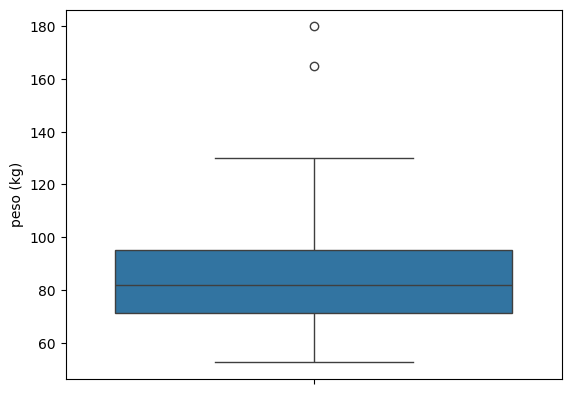

In [174]:
sns.boxplot(data=dataframe, y='peso (kg)')
plt.show()

### Onde há valores nulos?


In [175]:
print(dataframe.isnull().sum())

matr_aluno         0
idade             54
altura (cm)       54
sexo              54
peso (kg)         54
sono_h            54
exercicio_dias    54
exercicio_min     54
alimentacao       54
sedentario_h      54
agua_L            54
cafe_xic          54
refeicoes         53
polo              54
dtype: int64


## Tratando os dados

In [176]:
# Removendo os outliers
dataframe = dataframe[dataframe["peso (kg)"] < 120]

import numpy as np
# Removendo valores nulos
dataframe.replace("", np.nan, inplace=True)
dataframe = dataframe.dropna(subset=["peso (kg)"])


# Porém, como eu filtrei pelo peso, automaticamente eu já removi os valores nulos,
# mas deixei aqui apenas para fins didáticos.

In [177]:
print(dataframe.shape)

(130, 14)


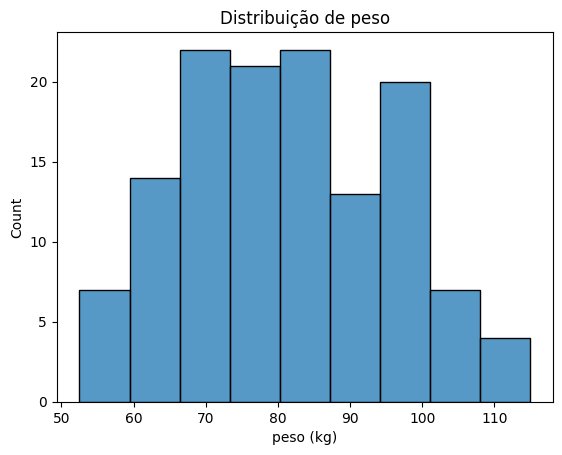

In [178]:
plt.title("Distribuição de peso")
sns.histplot(dataframe["peso (kg)"])
plt.show()

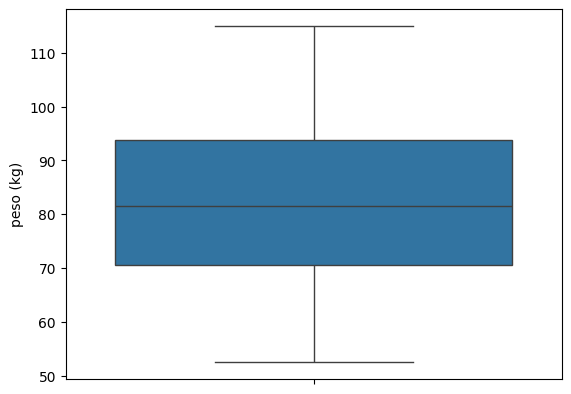

In [179]:
sns.boxplot(data=dataframe, y='peso (kg)')
plt.show()

In [180]:
print(dataframe.isnull().sum())

matr_aluno        0
idade             0
altura (cm)       0
sexo              0
peso (kg)         0
sono_h            0
exercicio_dias    0
exercicio_min     0
alimentacao       0
sedentario_h      0
agua_L            0
cafe_xic          0
refeicoes         0
polo              1
dtype: int64


In [181]:
dataframe.head()

,matr_aluno,idade,altura (cm),sexo,peso (kg),sono_h,exercicio_dias,exercicio_min,alimentacao,sedentario_h,agua_L,cafe_xic,refeicoes,polo
0,20242510284,50.0,177.0,M,91.0,7.0,4.0,45.0,1.0,12.0,2.0,4.0,4.0,Vila Velha
5,20242510289,47.0,176.0,M,72.0,8.0,3.0,50.0,1.0,7.0,2.0,1.0,4.0,Cachoeiro de Itapemirim
6,20242510290,43.0,176.0,M,115.0,6.0,3.0,60.0,1.0,12.0,3.0,2.0,3.0,Viana
7,20242510291,39.0,175.0,M,112.0,7.0,2.0,50.0,1.0,12.0,2.0,4.0,4.0,Viana
8,20242510292,26.0,183.0,M,99.0,8.0,2.0,60.0,1.0,10.0,3.0,3.0,4.0,Vitória
